In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

C:\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


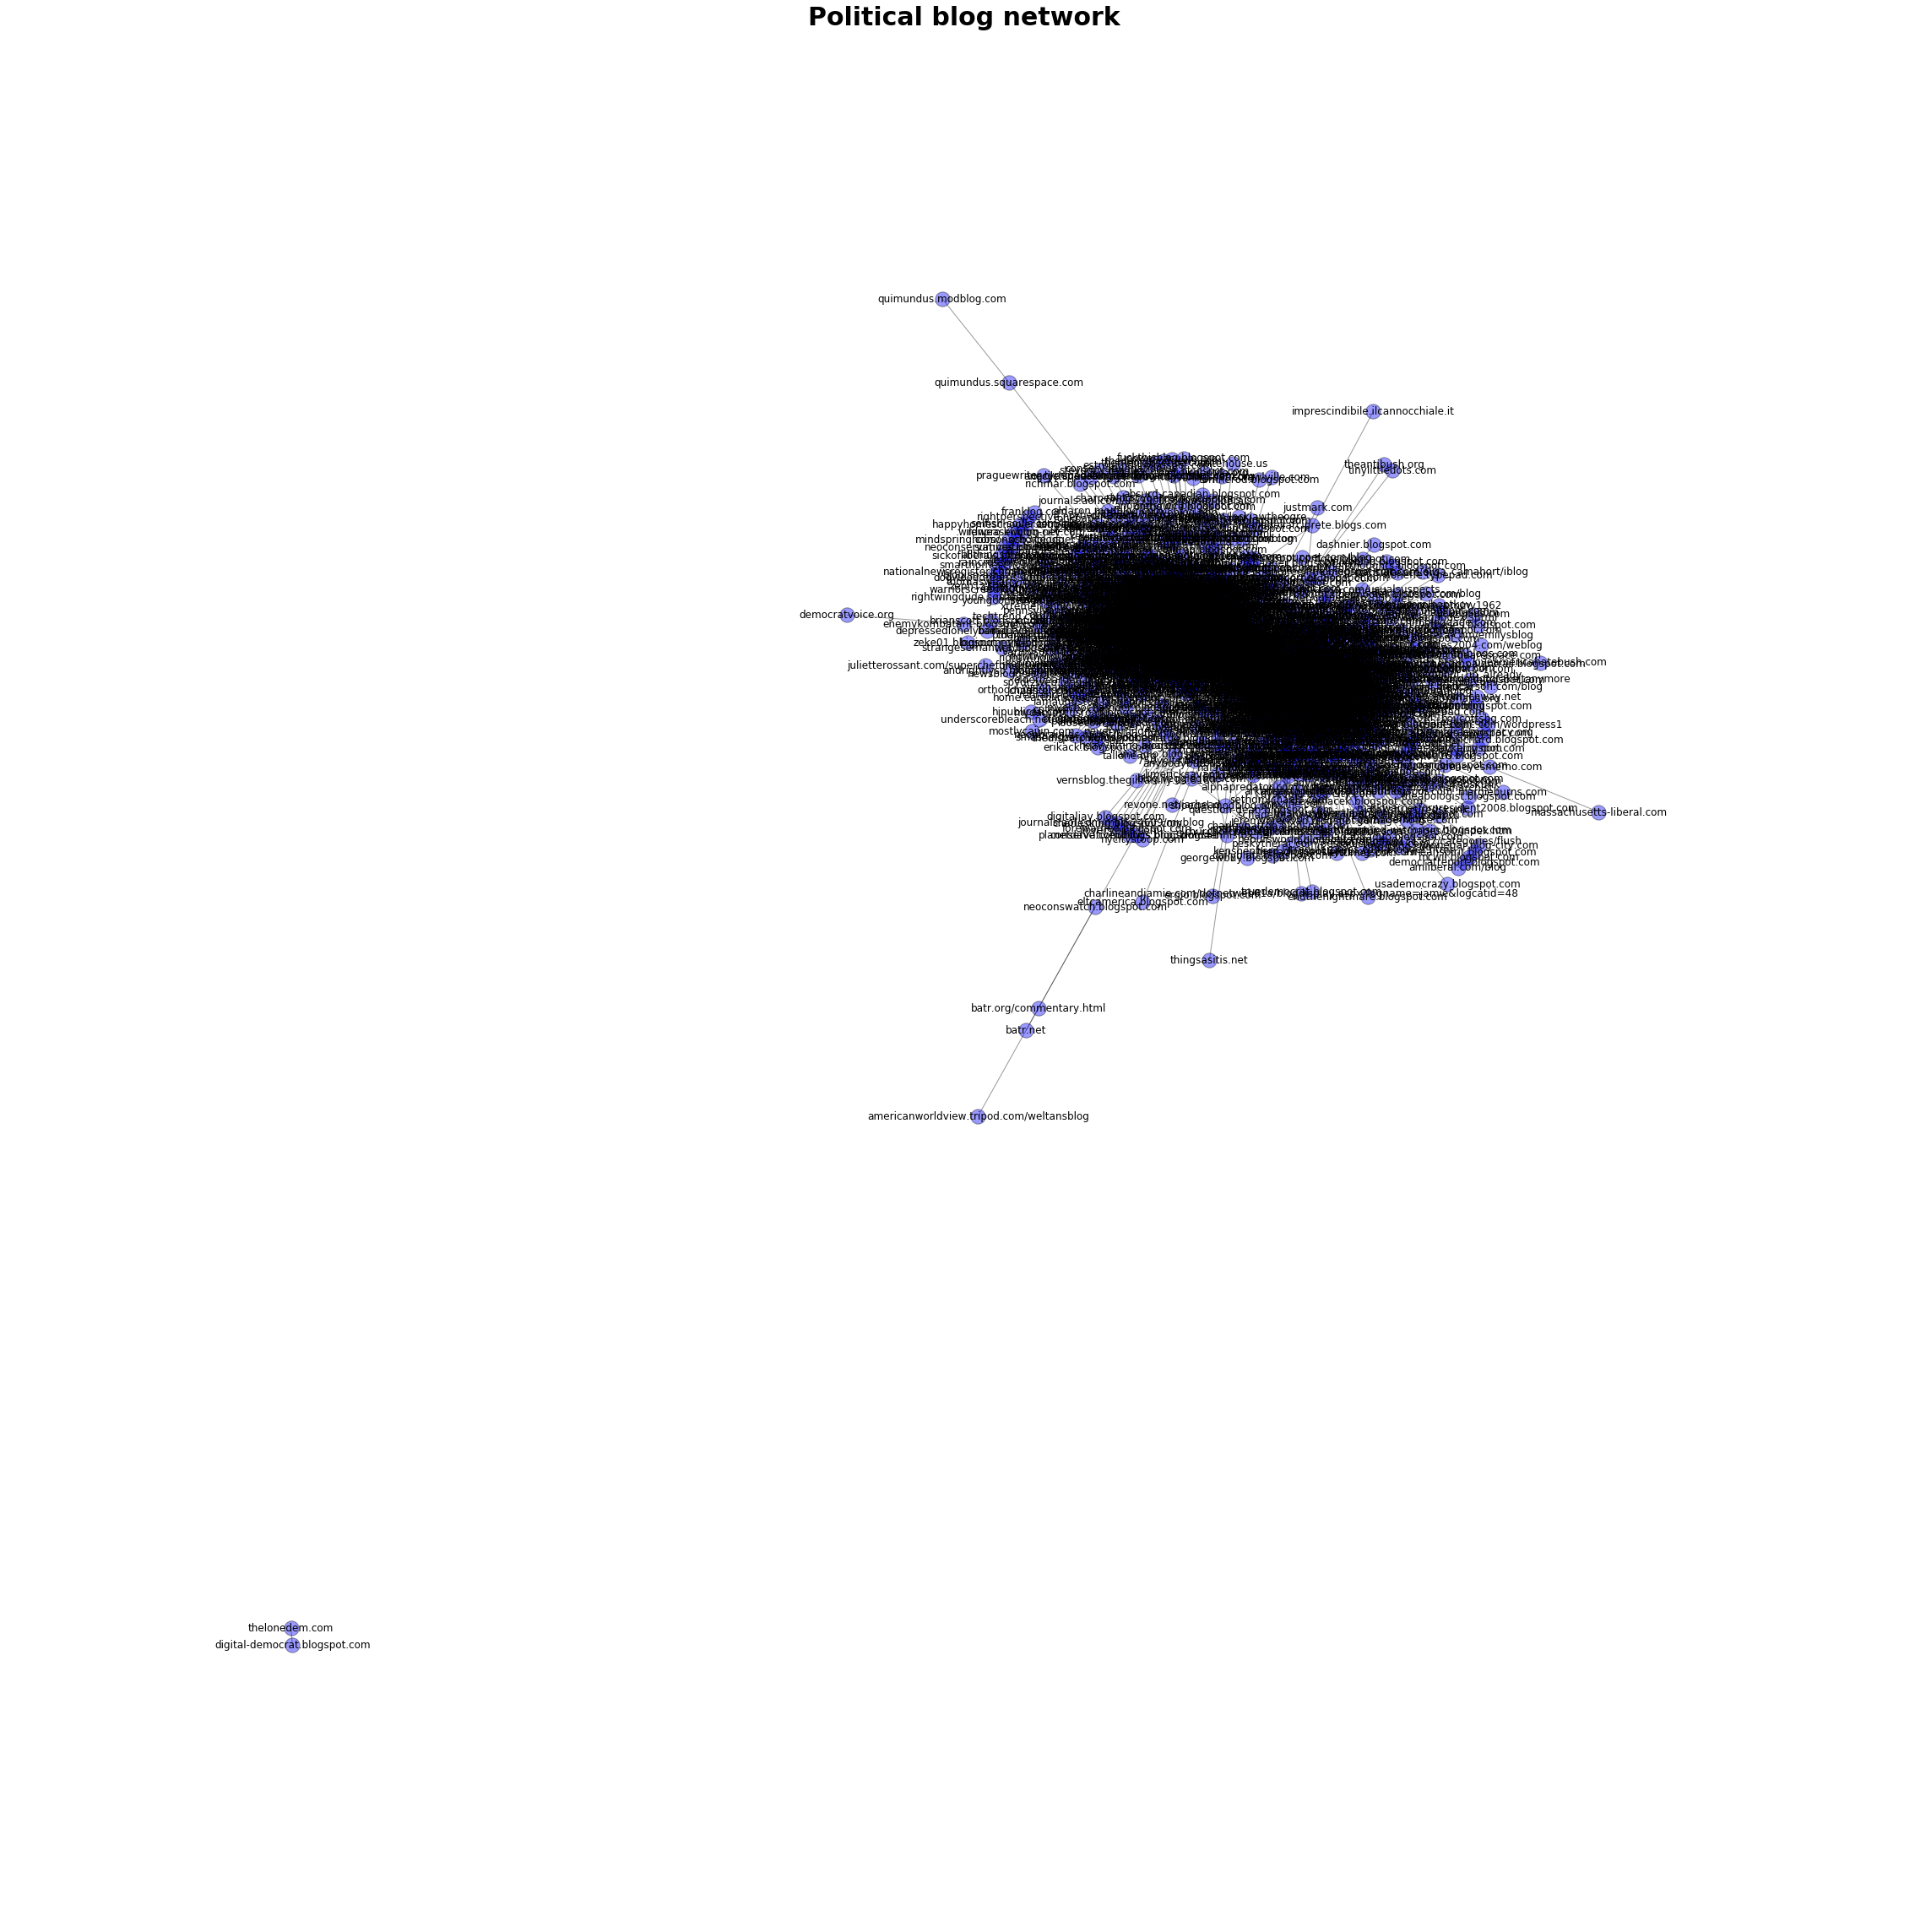

In [4]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [5]:
centrality= nx.eigenvector_centrality_numpy(G)

In [6]:
List = []
for node in centrality:
    List.append((node,centrality[node]))

In [7]:
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "******10 most influential blogs are:******"
sorted_list_desc[0:10]

******10 most influential blogs are:******


[(u'atrios.blogspot.com', 0.19482295898856752),
 (u'dailykos.com', 0.16090716385818696),
 (u'washingtonmonthly.com', 0.14654050463836446),
 (u'digbysblog.blogspot.com', 0.14265582251978656),
 (u'bodyandsoul.typepad.com', 0.14114853531288882),
 (u'liberaloasis.com', 0.13953785666658577),
 (u'tbogg.blogspot.com', 0.13704857535546844),
 (u'corrente.blogspot.com', 0.1294307313422498),
 (u'talkingpointsmemo.com', 0.12700931078294153),
 (u'dneiwert.blogspot.com', 0.12238703900638005)]

### 3.  What are the 10 least influential blogs?



In [8]:
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "******10 least influential blogs are:******"
sorted_list_asc[0:10]

******10 least influential blogs are:******


[(u'digital-democrat.blogspot.com', 1.3254733683428827e-19),
 (u'thelonedem.com', 2.3028521621537295e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.489792407708367e-09),
 (u'quimundus.modblog.com', 6.675725344810586e-08),
 (u'batr.org/commentary.html', 6.794245454784673e-07),
 (u'batr.net', 6.795053204382423e-07),
 (u'democratvoice.org', 1.0221602317224026e-06),
 (u'quimundus.squarespace.com', 6.056497487441803e-06),
 (u'massachusetts-liberal.com', 9.48471174661343e-06),
 (u'thingsasitis.net', 1.173702862660088e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [9]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('r')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

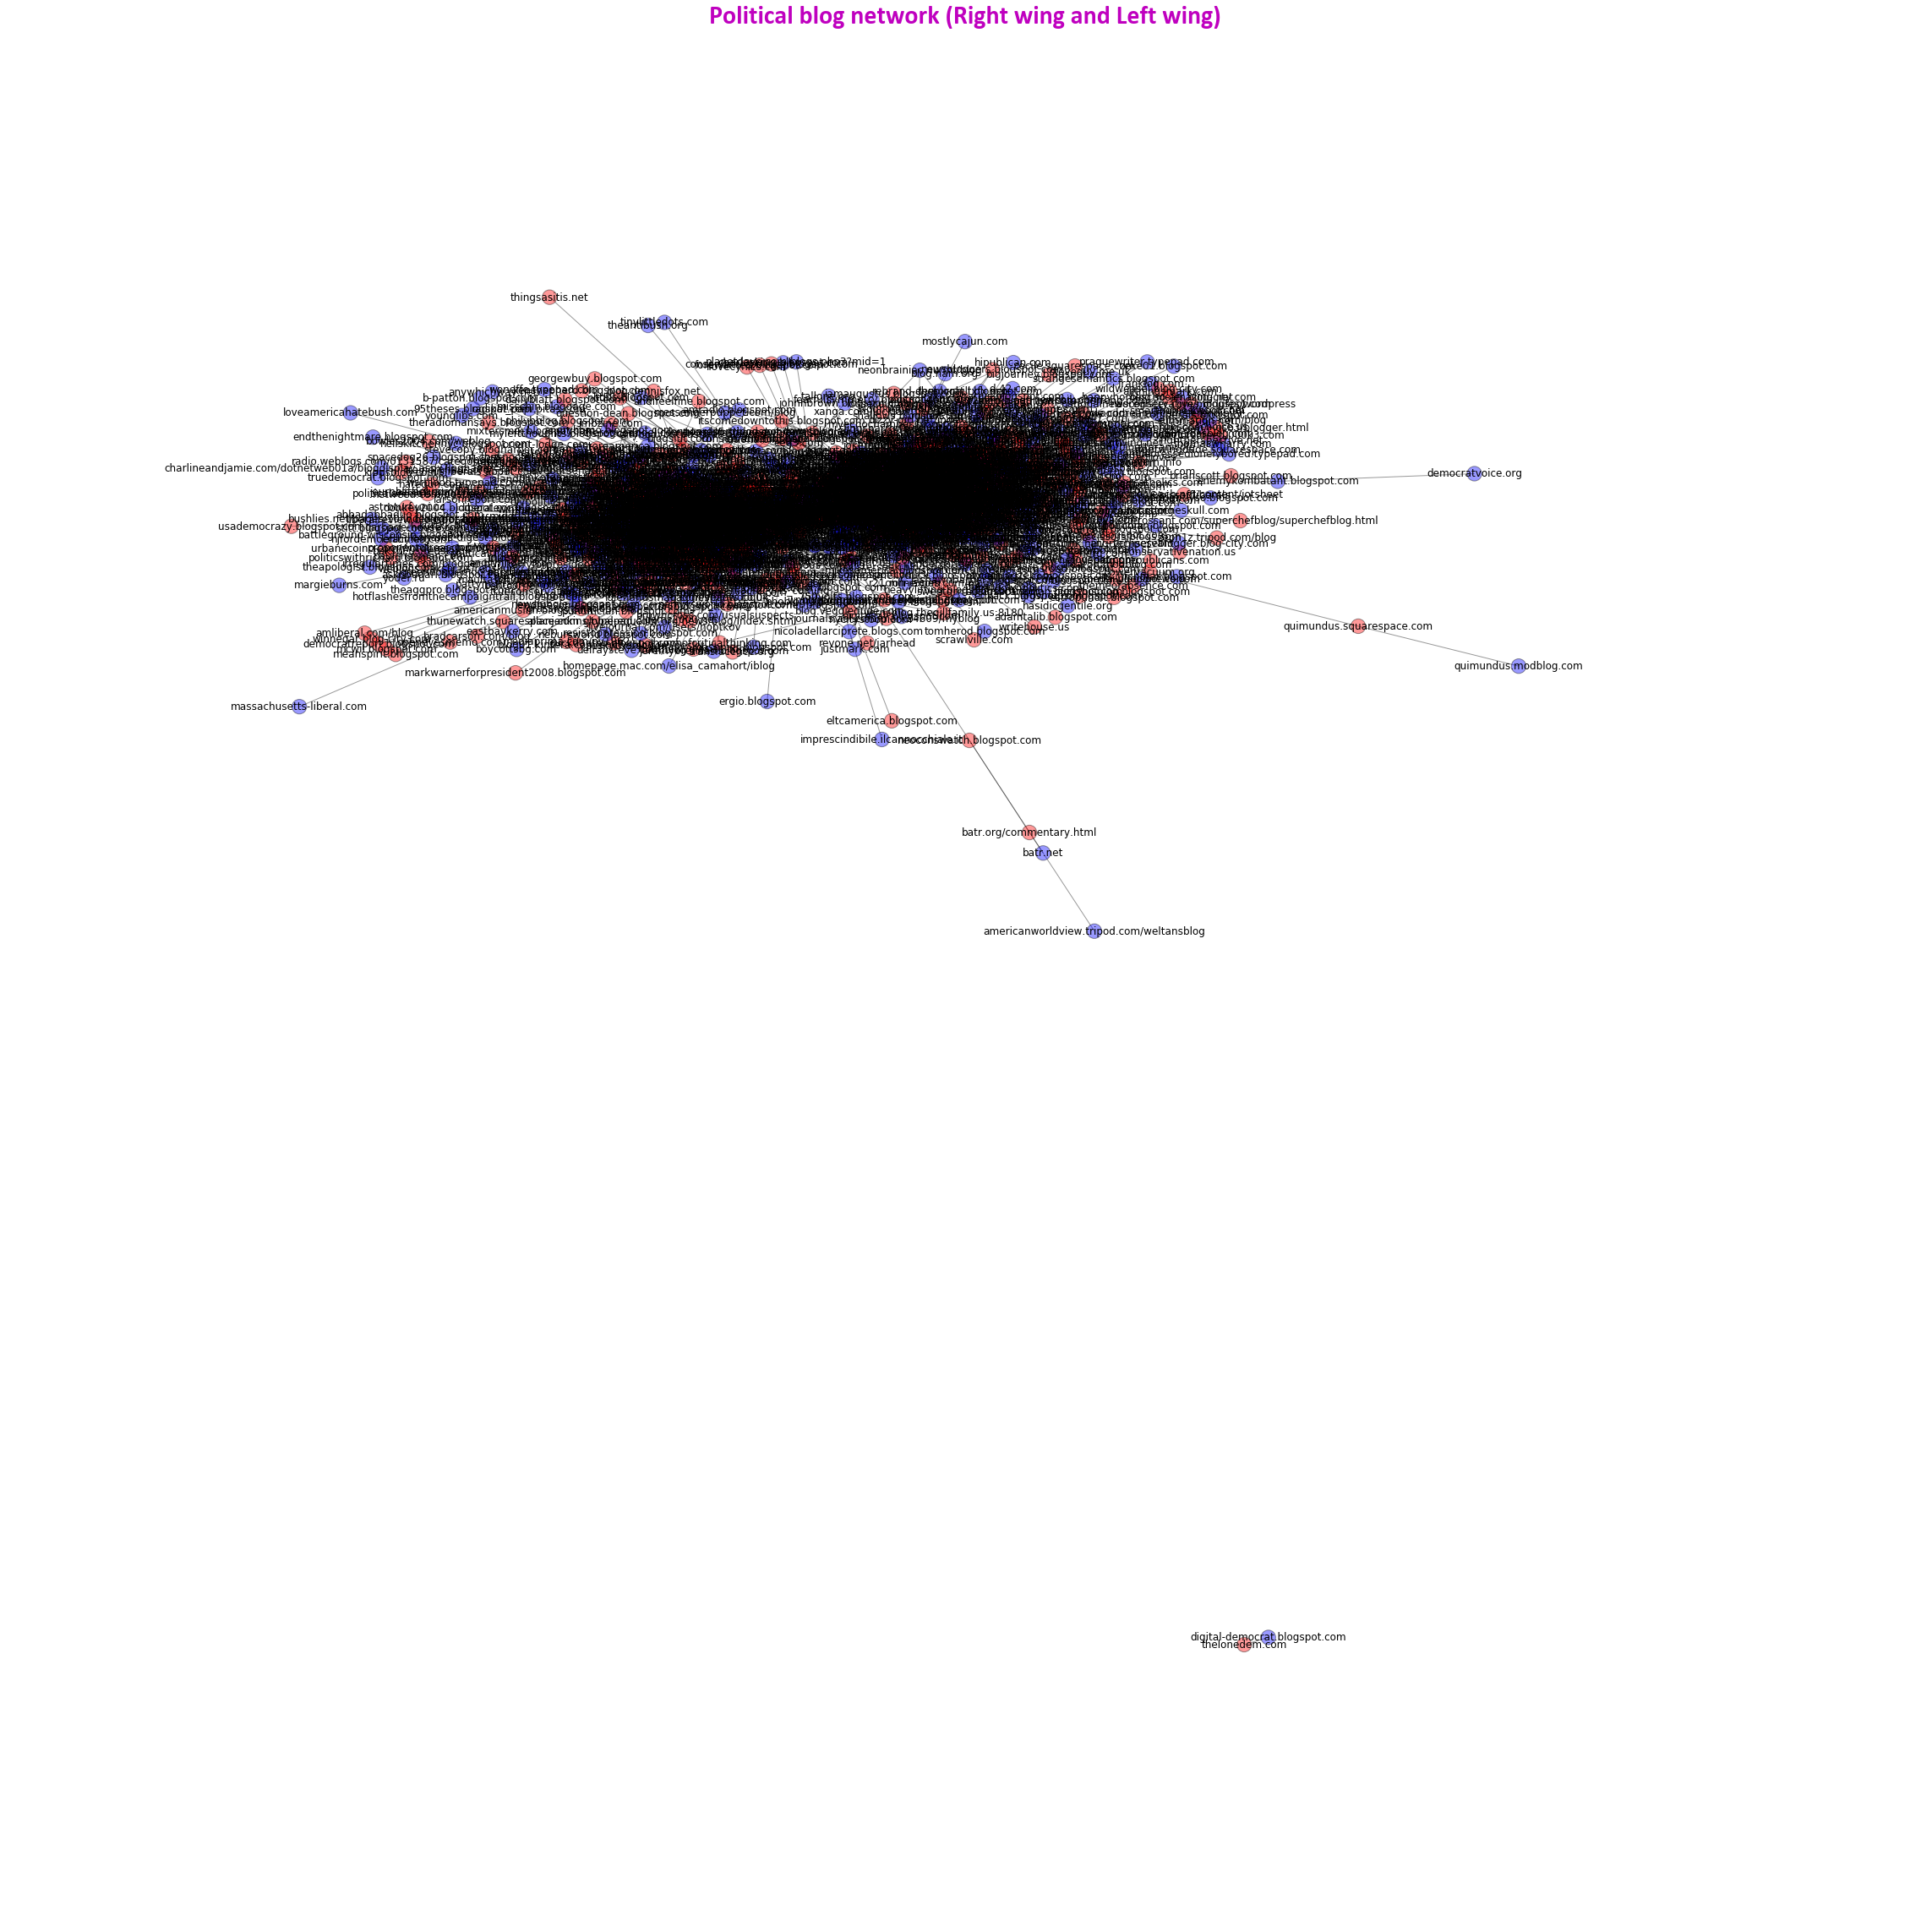

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Calibri',
            'color'      : 'm',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [11]:
# create weighted Left wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [12]:
# create weighted Right wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [13]:
#calculate the centrality of  of Left wing and right wing nodes separately. That gives importance of the node in each graph.
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [14]:
def sorting(centrality):
    """
    Takes centality as input.
    Make a list of (node, centrality).
    Sort the List in descending order to get most influential blog at the top.
    Sort the List in ascending order to get least influential blog at the top.
    Returns sorted list(ascending and descending order)
    """
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

In [15]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "***10 most influential Left wing blogs are:***"
sorted_list_desc_L[0:10]

***10 most influential Left wing blogs are:***


[(u'atrios.blogspot.com', 0.20959935892096684),
 (u'dailykos.com', 0.16836739525944214),
 (u'bodyandsoul.typepad.com', 0.15679475538395343),
 (u'liberaloasis.com', 0.1561161896488513),
 (u'digbysblog.blogspot.com', 0.15543644564126863),
 (u'tbogg.blogspot.com', 0.15010406230329543),
 (u'corrente.blogspot.com', 0.14485947796783408),
 (u'washingtonmonthly.com', 0.1396807202319528),
 (u'dneiwert.blogspot.com', 0.13474948943266668),
 (u'pandagon.net', 0.13295183425131976)]

In [16]:
print "***10 least influential Left wing blogs are:***"
sorted_list_asc_L[0:10]

***10 least influential Left wing blogs are:***


[(u'leavethematrix.blogspot.com', -8.014776326216329e-18),
 (u'homepage.mac.com/jpbarr/myblog', -7.699733475675672e-18),
 (u'atomicairship.com', -7.677886803027056e-18),
 (u'politicalinsanity.com', -7.582425947604888e-18),
 (u'steveguy.me.uk', -7.446834526719195e-18),
 (u'votervirginblog.blogspot.com', -7.304478486433767e-18),
 (u'jason.unitedworkers.org', -7.303876276092451e-18),
 (u'lettherebepeace.blogspot.com', -7.217181984747234e-18),
 (u'scott-niven.com/saltwaterpizza', -6.910815802536548e-18),
 (u'adamtalib.blogspot.com', -6.7604587073844536e-18)]

In [17]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "***10 most influential Right wing blogs are***"
sorted_list_desc_R[0:10]

***10 most influential Right wing blogs are***


[(u'instapundit.com', 0.21139229697591155),
 (u'blogsforbush.com', 0.2031620587596277),
 (u'hughhewitt.com', 0.17091871431714725),
 (u'lashawnbarber.com', 0.15887438313880795),
 (u'michellemalkin.com', 0.14740780092068134),
 (u'powerlineblog.com', 0.14624088810745056),
 (u'wizbangblog.com', 0.145674863639146),
 (u'littlegreenfootballs.com/weblog', 0.13915353653390372),
 (u'vodkapundit.com', 0.13681349941635143),
 (u'outsidethebeltway.com', 0.12258395519745537)]

In [18]:
print "***10 least influential Right wing blogs are***"
sorted_list_asc_R[0:10]

***10 least influential Right wing blogs are***


[(u'markheimonen.blogspot.com', -6.001620626283e-18),
 (u'newsjungle.blogspot.com', -5.809209126218501e-18),
 (u'rmcdaniel.blogspot.com', -5.661056626990094e-18),
 (u'gwbblows.blogspot.com', -5.636909875500804e-18),
 (u'jenjuskhan.blogspot.com', -5.5827063604169056e-18),
 (u'republitarian.org', -5.344512090965681e-18),
 (u'thedumbdemocrat.blogspot.com', -5.237487511202045e-18),
 (u'politicalhyperbole.blogspot.com', -5.169596066223129e-18),
 (u'poorandwhite.blogspot.com', -5.0645459004195305e-18),
 (u'gracefotography.com/graceblog/index.php', -4.939257123377526e-18)]